In [ ]:
"""
매우 비선형적이고 고차원 공간에서도 탁월한 성능을 보인다.
때문에 현실세계의 복잡한 문제를 해결하는 것에 탁월하다.

어떤 선분을 그었을 때 데이터들을 잘 분류할 수 있을까?
위와 같은 선분을 Hyper Plane라고 하는데 이 선분을 평행이동을 해서 가장 가까운 데이터에 맞닿는 선분을 Support Vector라 한다.
Support Vector가 여러개 생길텐데, 그 Support Vector로부터 margin을 최대하로 하는 선분을 찾는 알고리즘이다.
즉 Support Vector들의 중간 벡터를 찾는 것이다.
하지만 여기서 문제는 원과 같은 경계선으로 군집을 나눠야 되는 경우 (= 비선형적인 문제)이다.
이런 경우 데이터 자체를 선형적인 문제가 되도록 차원을 추가하여 맵핑해주는 방법이 있다.
하지만 여기서 또 복잡한 문제가 생기는데, 데이터를 선형적으로 바꾸어도, 축은 매우 복잡한 형태가 되어 버린다.
이러한 문제가 고차원적일수록 매번 다른 맵핑 함수를 적용해야 하고 축 또한 더욱 더 복잡한 형태가 된다.
위와 같은 문제를 차원의 저주라고 부른다. 우리는 이 차원의 저주를 피해가는 방법을 피해가야 한다.
Representer정리에 의해서 가중치는 맵핑함수와 선형관계에 있음이 알려져 있다.
그래서 초평면을 수식으로 나타낼 수 있는데 여러 계산을 거친 결과 맵핑함수 2개를 서로 곱하게 되고 이것은
맵핑함수의 내적과 같고 이것을 카파라고 정의한다. 카파는 또 커널 함수라고 부르기로 한다.
결론적으로 카파함수만 알면 이 초평면을 구할 수 있게 된다.
많은 연구 끝에 여러가지의 카파함수를 밝혀냈는데, 우리는 데이터의 형태에 따라 카파 함수를 골라 모델을 정의하면 된다.

카파(커널) 함수의 종류 : 선형 커널, 다항 커널, 가우시안 커널, 가우시안 RBF커널, 라플라스 RBF커널
SVM은 선형, 비선형 모든 문제에 대해 사용할 수 있다.
SVM은 SVC(Classification)와 SVR(Regression)이 있다.
SVR같은 경우 Support Vector와 중간 벡터 사이의 Margin 범위 밖에 Error가 최소가 되도록 하는 선을 찾는 알고리즘이다.
이렇게 하게 되면 Margin안에 최대한 많은 데이터들이 있게 되고 중간벡터는 그 데이터의 경향성을 나타내는 선을 의미한다.

(Decision Tree는 선형적인 문제에서만 성능이 괜찮게 나온다. 비선형적인 문제에 대해서는 SVM을 사용하는 것이 좋다.)
"""

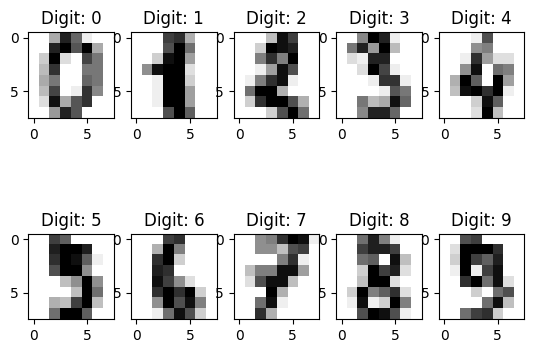

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree , svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터를 읽어오기
digits = datasets.load_digits()

# 이미지를 표시함. 
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()


In [3]:
images = digits.images
labels = digits.target

# 차원을 하나 줄인다. 
images = images.reshape(images.shape[0], -1)

# 학습 데이터와 검증 데이터를 나눈다.
n_samples = len(images)
train_size = int(n_samples * 2 / 3)

#서포트 벡터머신 모델을 생성한다. 
classifier = svm.SVC(C = 1.0, gamma = 0.001) # C : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
classifier.fit(images[:train_size], labels[:train_size]) # .fit(X_data, Y_data)

# 모델의 성능을 확인한다. 
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
      accuracy_score(expected, predicted)) # 정확도 96% ㄷㄷ... Deceision Tree에서는 50%도 안나왔음..
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted))

Accuracy:
 0.9632721202003339
Confusion matrix:
 [[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  0  0  0 54  0]
 [ 0  0  0  1  0  1  0  0  0 56]]


In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 